In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
ca_demographics_data_df = pd.DataFrame(pd.read_csv("../../Resources/Clean/ca_county_demographic_data-20210804.csv", dtype={"FIPS Code": object}))
ca_demographics_data_df.head()

,FIPS Code,County,Cumulative Cases (2020-02-01 - 2021-31-07),Cumulative Deaths (2020-02-01 - 2021-31-07),Cumulative Deaths /Cases (calculated by EK),Cases per capita (calculated by EK),Deaths per capita (calculated by EK),Total Population,Population density (people per sq. mile):\t,Pop % Less Than 18 Years of Age,...,# Uninsured (Adults),% Uninsured (Adults),% Uninsured (Adults) Error Margin,# Uninsured (Children),% Uninsured (Children),% Uninsured (Children) Error Margin,% Frequent Mental Distress,% Frequent Mental Distress Error Margin,% Frequent Physical Distress,% Frequent Physical Distress Error Margin
0,06001,Alameda,96932,1270,0.013102,0.057997,0.000760,"1,671,329","2,266.8\t",20.3,...,"63,772",6,5-6%,"8,207",2,2-3%,11,10-12%,11,10-11%
1,06003,Alpine,91,0,0.000000,0.080602,0.000000,"1,129",1.53,17.7,...,49,8,6-9%,9,4,3-5%,16,14-17%,15,14-17%
2,06005,Amador,3925,48,0.012229,0.098737,0.001207,"39,752",66.86,15.1,...,"1,315",7,6-8%,196,3,2-4%,14,13-15%,13,12-14%
3,06007,Butte,13433,204,0.015186,0.061286,0.000931,"219,186",133.94,20.3,...,"12,789",9,8-11%,"1,502",3,2-4%,15,14-16%,14,13-16%
4,06009,Calaveras,2344,57,0.024317,0.051062,0.001242,"45,905",45,17.1,...,"2,162",9,7-10%,288,4,3-5%,14,13-16%,13,12-14%


In [3]:
los_angeles_stats_df = pd.DataFrame(ca_demographics_data_df.iloc[18])
los_angeles_stats_df

,18
FIPS Code,06037
County,Los Angeles
Cumulative Cases (2020-02-01 - 2021-31-07),1260502
Cumulative Deaths (2020-02-01 - 2021-31-07),24703
Cumulative Deaths /Cases (calculated by EK),0.019598
Cases per capita (calculated by EK),0.125559
Deaths per capita (calculated by EK),0.002461
Total Population,"10,039,107"
Population density (people per sq. mile):\t,"2,473.51"
Pop % Less Than 18 Years of Age,21.4


In [4]:
ca_case_surveillance_clean_df = pd.DataFrame(pd.read_csv("../../Resources/Clean/ca_data_df.csv", dtype={"FIPS Code": object}))
ca_case_surveillance_clean_df.head()

,year,month,case_month,res_county,res_state,county_fips_code,age_group,sex,race/ethnicity,current_status,death_yn
0,2020,12,2020-12,CONTRA COSTA,CA,6013.0,0 - 17 years,Female,Hispanic/Latino,Laboratory-confirmed case,No
1,2021,3,2021-03,KERN,CA,6029.0,0 - 17 years,Female,Hispanic/Latino,Laboratory-confirmed case,No
2,2021,1,2021-01,EL DORADO,CA,6017.0,0 - 17 years,Male,Multiple/Other,Laboratory-confirmed case,No
3,2020,11,2020-11,SHASTA,CA,6089.0,18 to 49 years,Male,Multiple/Other,Laboratory-confirmed case,No
4,2021,1,2021-01,ORANGE,CA,12095.0,65+ years,Female,Black,Laboratory-confirmed case,No


## Calculating COVID-19 case and death statistics in Los Angeles County

In [57]:
# Isolate rows pertaining to Los Angles County
los_angeles_case_surveillance_df = pd.DataFrame(ca_case_surveillance_clean_df.loc[ca_case_surveillance_clean_df["res_county"] == "LOS ANGELES"])

# Find the number of COVID-19 cases in Los Angeles County
cases_los_angeles = los_angeles_case_surveillance_df.shape[0]

# Find the number of COVID-19 deaths in Los Angeles County
deaths_los_angeles = los_angeles_case_surveillance_df.loc[los_angeles_case_surveillance_df["death_yn"] == "Yes"].shape[0]

# Find the number of COVID-19 deaths each month in Los Angeles County
los_angeles_deaths_by_month_df = pd.DataFrame(los_angeles_case_surveillance_df[["case_month","death_yn"]]
                                                 .loc[los_angeles_case_surveillance_df[["case_month","death_yn"]]["death_yn"] == "Yes"]
                                                 .groupby(by="case_month").count())

# Rename "death_yn" column to "la_deaths"
los_angeles_deaths_by_month_df = los_angeles_deaths_by_month_df.rename(columns={"death_yn" : "la_deaths"})

# Calculate cumulative COVID-19 deaths each month in Los Angeles County
los_angeles_deaths_by_month_series = los_angeles_deaths_by_month_df["la_deaths"]

cumulative_los_angeles_deaths = [los_angeles_deaths_by_month_series.iloc[0]]
current_month_cumulative_la_deaths = los_angeles_deaths_by_month_series.iloc[0]

for idx in range(len(los_angeles_deaths_by_month_df)-1):
    current_month_cumulative_la_deaths = current_month_cumulative_la_deaths + los_angeles_deaths_by_month_series[idx+1]
    cumulative_los_angeles_deaths.append(current_month_cumulative_la_deaths)

# Add monthly cumulative deaths to Los Angeles County deaths dataframe
los_angeles_deaths_by_month_df["cumulative_los_angeles_deaths"] = cumulative_los_angeles_deaths

# Calculate COVID-19 infection fatality rate (IFR) in Los Angeles County
los_angles_ifr = round((deaths_los_angeles/cases_los_angeles) * 100, 2)

# Print total Los Angles County cases and deaths
print(f"Los Angeles County cases: {cases_los_angeles}\nLos Angeles County deaths: {deaths_los_angeles}\nLos Angeles County COVID-19 infection fatality rate (IFR): {los_angles_ifr}%")

# Show Los Angeles County deaths dataframe
los_angeles_deaths_by_month_df


Los Angeles County cases: 1211222
Los Angeles County deaths: 23152
Los Angeles County COVID-19 infection fatality rate (IFR): 1.91%


,la_deaths,cumulative_los_angeles_deaths
case_month,,
2020-03,381,381
2020-04,1680,2061
2020-05,1195,3256
2020-06,1076,4332
2020-07,1300,5632
2020-08,715,6347
2020-09,381,6728
2020-10,418,7146
2020-11,1728,8874


In [10]:
# Find index label for last row of dataframe
last_row = los_angeles_deaths_by_month_df.index.to_list()[-1]

In [11]:
# Find race/ethnicity groups in Los Angeles County
los_angeles_case_surveillance_df[["current_status", "race/ethnicity"]].groupby(by="race/ethnicity").count()

,current_status
race/ethnicity,
American Indian/Alaska Native,4599
Asian,60200
Black,54357
Hispanic/Latino,245147
Multiple/Other,56202
Native Hawaiian/Other Pacific Islander,5079
Non-Hispanic/Latino,15199
Unknown,641032
White,129407


## Calculating case and death statistics for American Indian & Alaska Native COVID-19 patients in Los Angeles County

In [47]:
# Isolate rows pertaining to cases of AIAN COVID-19 patients Los Angles County
aian_los_angeles_case_surveillance_df = pd.DataFrame(los_angeles_case_surveillance_df.loc[los_angeles_case_surveillance_df["race/ethnicity"] == "American Indian/Alaska Native"])

# Find the number of COVID-19 cases for AIAN patients in Los Angeles County
aian_los_angeles_cases = aian_los_angeles_case_surveillance_df.shape[0]

# Find the number of COVID-19 deaths for AIAN patients in Los Angeles County
aian_los_angeles_deaths = aian_los_angeles_case_surveillance_df.loc[aian_los_angeles_case_surveillance_df["death_yn"] == "Yes"].shape[0]

# Calculate cumulative COVID-19 deaths each month for AIAN patients in Los Angeles County
aian_los_angeles_deaths_by_month_df = pd.DataFrame(aian_los_angeles_case_surveillance_df[["case_month","death_yn"]]
                                                 .loc[aian_los_angeles_case_surveillance_df[["case_month","death_yn"]]["death_yn"] == "Yes"]
                                                 .groupby(by="case_month").count())

# Rename "death_yn" column to "aian_la_deaths"
aian_los_angeles_deaths_by_month_df = aian_los_angeles_deaths_by_month_df.rename(columns={"death_yn" : "aian_la_deaths"})

# Calculate cumulative COVID-19 deaths of AIAN patients each month in Los Angeles County
aian_los_angeles_deaths_by_month_series = aian_los_angeles_deaths_by_month_df["aian_la_deaths"]

try:
    cumulative_aian_los_angeles_deaths = [aian_los_angeles_deaths_by_month_series.iloc[0]]
    current_month_cumulative_aian_deaths = aian_los_angeles_deaths_by_month_series.iloc[0]

    for idx in range(len(aian_los_angeles_deaths_by_month_series)-1):
        current_month_cumulative_aian_deaths = current_month_cumulative_aian_deaths + aian_los_angeles_deaths_by_month_series[idx+1]
        cumulative_aian_los_angeles_deaths.append(current_month_cumulative_aian_deaths)

    # Add monthly cumulative deaths of AIAN patients to Los Angeles County aian patient deaths dataframe
    aian_los_angeles_deaths_by_month_df["cumulative_aian_la_deaths"] = cumulative_aian_los_angeles_deaths
except:
    aian_los_angeles_deaths_by_month_df = pd.DataFrame(aian_los_angeles_case_surveillance_df[["case_month","current_status"]]
                                                 .groupby(by="case_month").count())
    aian_los_angeles_deaths_by_month_df["aian_la_deaths"] = np.nan
    aian_los_angeles_deaths_by_month_df["cumulative_aian_la_deaths"] = np.nan
    aian_los_angeles_deaths_by_month_df = pd.DataFrame(aian_los_angeles_deaths_by_month_df.fillna(value=0))
    aian_los_angeles_deaths_by_month_df = pd.DataFrame(aian_los_angeles_deaths_by_month_df.drop(columns="current_status"))
    
# Calculate COVID-19 infection fatality rate (IFR) for AIAN patients in Los Angeles County
aian_los_angles_ifr = round((aian_los_angeles_deaths/aian_los_angeles_cases) * 100, 2)

# Print total Los Angles County cases and deaths for AIAN patients
print(f"American Indian & Alaska Native Los Angeles County cases: {aian_los_angeles_cases}\nAmerican Indian & Alaska Native Los Angeles County deaths: {aian_los_angeles_deaths}\nAmerican Indian & Alaska Native Los Angeles County infection fatality rate (IFR): {aian_los_angles_ifr}%")

# Display Los Angeles County AIAN patient deaths dataframe
aian_los_angeles_deaths_by_month_df

American Indian & Alaska Native Los Angeles County cases: 4599
American Indian & Alaska Native Los Angeles County deaths: 0
American Indian & Alaska Native Los Angeles County infection fatality rate (IFR): 0.0%


,aian_la_deaths,cumulative_aian_la_deaths
case_month,,
2020-05,0.0,0.0
2020-06,0.0,0.0
2020-07,0.0,0.0
2020-08,0.0,0.0
2020-09,0.0,0.0
2020-10,0.0,0.0
2020-11,0.0,0.0
2020-12,0.0,0.0
2021-01,0.0,0.0


## Merge dataframes: Los Angeles County deaths, Los Angeles County American Indian & Alaska Native patient deaths

In [13]:
# Merge Los Angeles County deaths and Los Angeles County AIAN patient deaths dataframes
los_angeles_and_aian_deaths_df = pd.DataFrame(los_angeles_deaths_by_month_df.merge(right=aian_los_angeles_deaths_by_month_df,
                                     how="outer",
                                     on="case_month"))

# Make dates uniform across dataframes
los_angeles_and_aian_deaths_df = pd.DataFrame(los_angeles_and_aian_deaths_df.truncate(after=last_row))

# Fill NaN values for cumulative AIAN patient deaths
los_angeles_and_aian_deaths_df["cumulative_aian_la_deaths"].fillna(method='ffill', inplace=True)

# Fill remaining NaN values with 0
los_angeles_and_aian_deaths_df = pd.DataFrame(los_angeles_and_aian_deaths_df.fillna(value=0))

# Calculate the percentage of Los Angeles County deaths were AIAN patients
cumulative_los_angeles_deaths_series = los_angeles_and_aian_deaths_df["cumulative_los_angeles_deaths"]
cumulative_aian_la_deaths_series = los_angeles_and_aian_deaths_df["cumulative_aian_la_deaths"]
percentage_deaths_aian_los_angeles = round((cumulative_aian_la_deaths_series / cumulative_los_angeles_deaths_series) * 100, 2)

# Add the percenage of AIAN patient deaths to dataframe
los_angeles_and_aian_deaths_df["percentage_deaths_aian"] = percentage_deaths_aian_los_angeles

# Display dataframe
los_angeles_and_aian_deaths_df

,la_deaths,cumulative_los_angeles_deaths,aian_la_deaths,cumulative_aian_la_deaths,percentage_deaths_aian
case_month,,,,,
2020-03,381.0,381.0,0.0,0.0,0.0
2020-04,1680.0,2061.0,0.0,0.0,0.0
2020-05,1195.0,3256.0,0.0,0.0,0.0
2020-06,1076.0,4332.0,0.0,0.0,0.0
2020-07,1300.0,5632.0,0.0,0.0,0.0
2020-08,715.0,6347.0,0.0,0.0,0.0
2020-09,381.0,6728.0,0.0,0.0,0.0
2020-10,418.0,7146.0,0.0,0.0,0.0
2020-11,1728.0,8874.0,0.0,0.0,0.0


## Calculating case and death statistics for Asian COVID-19 patients in Los Angeles County

In [49]:
# Isolate rows pertaining to cases of Asian COVID-19 patients Los Angles County
asian_los_angeles_case_surveillance_df = pd.DataFrame(los_angeles_case_surveillance_df.loc[los_angeles_case_surveillance_df["race/ethnicity"] == "Asian"])

# Find the number of COVID-19 cases for Asian patients in Los Angeles County
asian_los_angeles_cases = asian_los_angeles_case_surveillance_df.shape[0]

# Find the number of COVID-19 deaths for Asian patients in Los Angeles County
asian_los_angeles_deaths = asian_los_angeles_case_surveillance_df.loc[asian_los_angeles_case_surveillance_df["death_yn"] == "Yes"].shape[0]

# Calculate cumulative COVID-19 deaths each month for Asian patients in Los Angeles County
asian_los_angeles_deaths_by_month_df = pd.DataFrame(asian_los_angeles_case_surveillance_df[["case_month","death_yn"]]
                                                 .loc[asian_los_angeles_case_surveillance_df[["case_month","death_yn"]]["death_yn"] == "Yes"]
                                                 .groupby(by="case_month").count())

# Rename "death_yn" column to "asian_la_deaths"
asian_los_angeles_deaths_by_month_df = asian_los_angeles_deaths_by_month_df.rename(columns={"death_yn" : "asian_la_deaths"})

# Calculate cumulative COVID-19 deaths of Asian patients each month in Los Angeles County
asian_los_angeles_deaths_by_month_series = asian_los_angeles_deaths_by_month_df["asian_la_deaths"]

cumulative_asian_los_angeles_deaths = [asian_los_angeles_deaths_by_month_series.iloc[0]]
current_month_cumulative_asian_deaths = asian_los_angeles_deaths_by_month_series.iloc[0]

for idx in range(len(asian_los_angeles_deaths_by_month_series)-1):
    current_month_cumulative_asian_deaths = current_month_cumulative_asian_deaths + asian_los_angeles_deaths_by_month_series[idx+1]
    cumulative_asian_los_angeles_deaths.append(current_month_cumulative_asian_deaths)

# Add monthly cumulative deaths of Asian patients to Los Angeles County Asian patient deaths dataframe
asian_los_angeles_deaths_by_month_df["cumulative_asian_la_deaths"] = cumulative_asian_los_angeles_deaths

# Calculate COVID-19 infection fatality rate (IFR) for Asian patients in Los Angeles County
asian_los_angles_ifr = round((asian_los_angeles_deaths/asian_los_angeles_cases) * 100, 2)

# Print total Los Angles County cases and deaths for Asian patients
print(f"Asian Los Angeles County cases: {asian_los_angeles_cases}\nAsian Los Angeles County deaths: {asian_los_angeles_deaths}\nAsian Los Angeles County infection fatality rate (IFR): {asian_los_angles_ifr}%")

# Display Los Angeles County Asian patient deaths dataframe
asian_los_angeles_deaths_by_month_df

Asian Los Angeles County cases: 60200
Asian Los Angeles County deaths: 3163
Asian Los Angeles County infection fatality rate (IFR): 5.25%


,asian_la_deaths,cumulative_asian_la_deaths
case_month,,
2020-03,57,57
2020-04,304,361
2020-05,169,530
2020-06,92,622
2020-07,168,790
2020-08,112,902
2020-09,42,944
2020-10,47,991
2020-11,209,1200


## Merge dataframes: Los Angeles County deaths, Los Angeles County Asian patient deaths

In [15]:
# Merge Los Angeles County deaths and Los Angeles County Asian patient deaths dataframes
los_angeles_and_asian_deaths_df = pd.DataFrame(los_angeles_deaths_by_month_df.merge(right=asian_los_angeles_deaths_by_month_df,
                                     how="outer",
                                     on="case_month"))

# Fill NaN values for cumulative Asian patient deaths
los_angeles_and_asian_deaths_df["cumulative_asian_la_deaths"].fillna(method='ffill', inplace=True)

# Calculate the percentage of Los Angeles County deaths were Asian patients
cumulative_los_angeles_deaths_series = los_angeles_and_asian_deaths_df["cumulative_los_angeles_deaths"]
cumulative_asian_la_deaths_series = los_angeles_and_asian_deaths_df["cumulative_asian_la_deaths"]
percentage_deaths_asian_los_angeles = round((cumulative_asian_la_deaths_series / cumulative_los_angeles_deaths_series) * 100, 2)

# Add the percenage of Asian patient deaths to dataframe
los_angeles_and_asian_deaths_df["percentage_deaths_asian"] = percentage_deaths_asian_los_angeles

# Display dataframe
los_angeles_and_asian_deaths_df

,la_deaths,cumulative_los_angeles_deaths,asian_la_deaths,cumulative_asian_la_deaths,percentage_deaths_asian
case_month,,,,,
2020-03,381,381,57.0,57.0,14.96
2020-04,1680,2061,304.0,361.0,17.52
2020-05,1195,3256,169.0,530.0,16.28
2020-06,1076,4332,92.0,622.0,14.36
2020-07,1300,5632,168.0,790.0,14.03
2020-08,715,6347,112.0,902.0,14.21
2020-09,381,6728,42.0,944.0,14.03
2020-10,418,7146,47.0,991.0,13.87
2020-11,1728,8874,209.0,1200.0,13.52


## Calculating case and death statistics for Black COVID-19 patients in Los Angeles County

In [50]:
# Isolate rows pertaining to cases of Black COVID-19 patients Los Angles County
black_los_angeles_case_surveillance_df = pd.DataFrame(los_angeles_case_surveillance_df.loc[los_angeles_case_surveillance_df["race/ethnicity"] == "Black"])

# Find the number of COVID-19 cases for Black patients in Los Angeles County
black_los_angeles_cases = black_los_angeles_case_surveillance_df.shape[0]

# Find the number of COVID-19 deaths for Black patients in Los Angeles County
black_los_angeles_deaths = black_los_angeles_case_surveillance_df.loc[black_los_angeles_case_surveillance_df["death_yn"] == "Yes"].shape[0]


# Calculate cumulative COVID-19 deaths each month for Black patients in Los Angeles County
black_los_angeles_deaths_by_month_df = pd.DataFrame(black_los_angeles_case_surveillance_df[["case_month","death_yn"]]
                                                 .loc[black_los_angeles_case_surveillance_df[["case_month","death_yn"]]["death_yn"] == "Yes"]
                                                 .groupby(by="case_month").count())

# Rename "death_yn" column to "black_la_deaths"
black_los_angeles_deaths_by_month_df = black_los_angeles_deaths_by_month_df.rename(columns={"death_yn" : "black_la_deaths"})


# Calculate cumulative COVID-19 deaths of Black patients each month in Los Angeles County
black_los_angeles_deaths_by_month_series = black_los_angeles_deaths_by_month_df["black_la_deaths"]

cumulative_black_los_angeles_deaths = [black_los_angeles_deaths_by_month_series.iloc[0]]
current_month_cumulative_deaths = black_los_angeles_deaths_by_month_series.iloc[0]

for idx in range(len(black_los_angeles_deaths_by_month_series)-1):
    current_month_cumulative_deaths = current_month_cumulative_deaths + black_los_angeles_deaths_by_month_series[idx+1]
    cumulative_black_los_angeles_deaths.append(current_month_cumulative_deaths)

# Add monthly cumulative deaths of Black patients to Los Angeles County Black patient deaths dataframe
black_los_angeles_deaths_by_month_df["cumulative_black_la_deaths"] = cumulative_black_los_angeles_deaths

# Calculate COVID-19 infection fatality rate (IFR) for Black patients in Los Angeles County
black_los_angles_ifr = round((black_los_angeles_deaths/black_los_angeles_cases) * 100, 2)

# Print total Los Angles County cases and deaths for Black patients
print(f"Black Los Angeles County cases: {black_los_angeles_cases}\nBlack Los Angeles County deaths: {black_los_angeles_deaths}\nBlack Los Angeles County infection fatality rate (IFR): {black_los_angles_ifr}%")

# Show Los Angeles County Black patient deaths dataframe
black_los_angeles_deaths_by_month_df

Black Los Angeles County cases: 54357
Black Los Angeles County deaths: 1829
Black Los Angeles County infection fatality rate (IFR): 3.36%


,black_la_deaths,cumulative_black_la_deaths
case_month,,
2020-03,52,52
2020-04,199,251
2020-05,147,398
2020-06,75,473
2020-07,94,567
2020-08,43,610
2020-11,130,740
2020-12,606,1346
2021-01,428,1774


## Merge dataframes: Los Angeles County deaths, Los Angeles County Black patient deaths

In [17]:
# Merge Los Angeles County deaths and Los Angeles County Black patient deaths dataframes
los_angeles_and_black_deaths_df = pd.DataFrame(los_angeles_deaths_by_month_df.merge(right=black_los_angeles_deaths_by_month_df,
                                     how="outer",
                                     on="case_month"))

# Fill NaN values for cumulative Black patient deaths
los_angeles_and_black_deaths_df["cumulative_black_la_deaths"].fillna(method='ffill', inplace=True)

# Calculate the percentage of Los Angeles County deaths were Black patients
cumulative_los_angeles_deaths_series = los_angeles_and_black_deaths_df["cumulative_los_angeles_deaths"]
cumulative_black_la_deaths_series = los_angeles_and_black_deaths_df["cumulative_black_la_deaths"]
percentage_deaths_black_los_angeles = round((cumulative_black_la_deaths_series / cumulative_los_angeles_deaths_series) * 100, 2)

# Add the percenage of Black patient deaths to dataframe
los_angeles_and_black_deaths_df["percentage_deaths_black"] = percentage_deaths_black_los_angeles

# Display dataframe
los_angeles_and_black_deaths_df

,la_deaths,cumulative_los_angeles_deaths,black_la_deaths,cumulative_black_la_deaths,percentage_deaths_black
case_month,,,,,
2020-03,381,381,52.0,52.0,13.65
2020-04,1680,2061,199.0,251.0,12.18
2020-05,1195,3256,147.0,398.0,12.22
2020-06,1076,4332,75.0,473.0,10.92
2020-07,1300,5632,94.0,567.0,10.07
2020-08,715,6347,43.0,610.0,9.61
2020-09,381,6728,NaN,610.0,9.07
2020-10,418,7146,NaN,610.0,8.54
2020-11,1728,8874,130.0,740.0,8.34


## Calculating case and death statistics for Hispanic/Latino COVID-19 patients in Los Angeles County

In [51]:
# Isolate rows pertaining to cases of Hispanic/Latino COVID-19 patients Los Angles County
hispanic_los_angeles_case_surveillance_df = pd.DataFrame(los_angeles_case_surveillance_df.loc[los_angeles_case_surveillance_df["race/ethnicity"] == "Hispanic/Latino"])

# Find the number of COVID-19 cases for Hispanic/Latino patients in Los Angeles County
hispanic_los_angeles_cases = hispanic_los_angeles_case_surveillance_df.shape[0]

# Find the number of COVID-19 deaths for Hispanic/Latino patients in Los Angeles County
hispanic_los_angeles_deaths = hispanic_los_angeles_case_surveillance_df.loc[hispanic_los_angeles_case_surveillance_df["death_yn"] == "Yes"].shape[0]

# Calculate cumulative COVID-19 deaths each month for Hispanic/Latino patients in Los Angeles County
hispanic_los_angeles_deaths_by_month_df = pd.DataFrame(hispanic_los_angeles_case_surveillance_df[["case_month","death_yn"]]
                                                 .loc[hispanic_los_angeles_case_surveillance_df[["case_month","death_yn"]]["death_yn"] == "Yes"]
                                                 .groupby(by="case_month").count())

# Rename "death_yn" column to "hispanic_la_deaths"
hispanic_los_angeles_deaths_by_month_df = hispanic_los_angeles_deaths_by_month_df.rename(columns={"death_yn" : "hispanic_la_deaths"})

# Calculate cumulative COVID-19 deaths of Hispanic/Latino patients each month in Los Angeles County
hispanic_los_angeles_deaths_by_month_series = hispanic_los_angeles_deaths_by_month_df["hispanic_la_deaths"]

try:
    cumulative_hispanic_los_angeles_deaths = [hispanic_los_angeles_deaths_by_month_series.iloc[0]]
    current_month_cumulative_hispanic_deaths = hispanic_los_angeles_deaths_by_month_series.iloc[0]

    for idx in range(len(hispanic_los_angeles_deaths_by_month_series)-1):
        current_month_cumulative_hispanic_deaths = current_month_cumulative_hispanic_deaths + hispanic_los_angeles_deaths_by_month_series[idx+1]
        cumulative_hispanic_los_angeles_deaths.append(current_month_cumulative_hispanic_deaths)

    # Add monthly cumulative deaths of Hispanic/Latino patients to Los Angeles County hispanic patient deaths dataframe
    hispanic_los_angeles_deaths_by_month_df["cumulative_hispanic_la_deaths"] = cumulative_hispanic_los_angeles_deaths
except:
    hispanic_los_angeles_deaths_by_month_df = pd.DataFrame(hispanic_los_angeles_case_surveillance_df[["case_month","current_status"]]
                                                 .groupby(by="case_month").count())
    hispanic_los_angeles_deaths_by_month_df["hispanic_la_deaths"] = np.nan
    hispanic_los_angeles_deaths_by_month_df["cumulative_hispanic_la_deaths"] = np.nan
    hispanic_los_angeles_deaths_by_month_df = pd.DataFrame(hispanic_los_angeles_deaths_by_month_df.fillna(value=0))
    hispanic_los_angeles_deaths_by_month_df = pd.DataFrame(hispanic_los_angeles_deaths_by_month_df.drop(columns="current_status"))
    
# Calculate COVID-19 infection fatality rate (IFR) for Hispanic/Latino patients in Los Angeles County
hispanic_los_angles_ifr = round((hispanic_los_angeles_deaths/hispanic_los_angeles_cases) * 100, 2)

# Print total Los Angles County cases and deaths for Hispanic/Latino patients
print(f"Hispanic/Latino Los Angeles County cases: {hispanic_los_angeles_cases}\nHispanic/Latino Los Angeles County deaths: {hispanic_los_angeles_deaths}\nHispanic/Latino Los Angeles County infection fatality rate (IFR): {hispanic_los_angles_ifr}%")

# Display Los Angeles County Hispanic/Latino patient deaths dataframe
hispanic_los_angeles_deaths_by_month_df

Hispanic/Latino Los Angeles County cases: 245147
Hispanic/Latino Los Angeles County deaths: 12188
Hispanic/Latino Los Angeles County infection fatality rate (IFR): 4.97%


,hispanic_la_deaths,cumulative_hispanic_la_deaths
case_month,,
2020-03,169,169
2020-04,700,869
2020-05,541,1410
2020-06,667,2077
2020-07,791,2868
2020-08,394,3262
2020-09,219,3481
2020-10,273,3754
2020-11,948,4702


## Merge dataframes: Los Angeles County deaths, Los Angeles County Hispanic/Latino patient deaths

In [19]:
# Merge Los Angeles County deaths and Los Angeles County Hispanic/Latino patient deaths dataframes
los_angeles_and_hispanic_deaths_df = pd.DataFrame(los_angeles_deaths_by_month_df.merge(right=hispanic_los_angeles_deaths_by_month_df,
                                     how="outer",
                                     on="case_month"))

# Make dates uniform across dataframes
los_angeles_and_hispanic_deaths_df = pd.DataFrame(los_angeles_and_hispanic_deaths_df.truncate(after=last_row))

# Fill NaN values for cumulative Hispanic/Latino patient deaths
los_angeles_and_hispanic_deaths_df["cumulative_hispanic_la_deaths"].fillna(method='ffill', inplace=True)

# Calculate the percentage of Los Angeles County deaths were Hispanic/Latino patients
cumulative_los_angeles_deaths_series = los_angeles_and_hispanic_deaths_df["cumulative_los_angeles_deaths"]
cumulative_hispanic_la_deaths_series = los_angeles_and_hispanic_deaths_df["cumulative_hispanic_la_deaths"]
percentage_deaths_hispanic_los_angeles = round((cumulative_hispanic_la_deaths_series / cumulative_los_angeles_deaths_series) * 100, 2)

# Add the percenage of Hispanic/Latino patient deaths to dataframe
los_angeles_and_hispanic_deaths_df["percentage_deaths_hispanic"] = percentage_deaths_hispanic_los_angeles

# Fill NaN values with 0
los_angeles_and_hispanic_deaths_df = pd.DataFrame(los_angeles_and_hispanic_deaths_df.fillna(value=0))

# Display dataframe
los_angeles_and_hispanic_deaths_df

,la_deaths,cumulative_los_angeles_deaths,hispanic_la_deaths,cumulative_hispanic_la_deaths,percentage_deaths_hispanic
case_month,,,,,
2020-03,381,381,169,169,44.36
2020-04,1680,2061,700,869,42.16
2020-05,1195,3256,541,1410,43.30
2020-06,1076,4332,667,2077,47.95
2020-07,1300,5632,791,2868,50.92
2020-08,715,6347,394,3262,51.39
2020-09,381,6728,219,3481,51.74
2020-10,418,7146,273,3754,52.53
2020-11,1728,8874,948,4702,52.99


## Calculating case and death statistics for Native Hawaiian/Other Pacific Islander COVID-19 patients in Los Angeles County

In [52]:
# Isolate rows pertaining to cases of NHOPI COVID-19 patients Los Angles County
nhopi_los_angeles_case_surveillance_df = pd.DataFrame(los_angeles_case_surveillance_df.loc[los_angeles_case_surveillance_df["race/ethnicity"] == "Native Hawaiian/Other Pacific Islander"])

# Find the number of COVID-19 cases for NHOPI patients in Los Angeles County
nhopi_los_angeles_cases = nhopi_los_angeles_case_surveillance_df.shape[0]

# Find the number of COVID-19 deaths for NHOPI patients in Los Angeles County
nhopi_los_angeles_deaths = nhopi_los_angeles_case_surveillance_df.loc[nhopi_los_angeles_case_surveillance_df["death_yn"] == "Yes"].shape[0]

# Calculate cumulative COVID-19 deaths each month for NHOPI patients in Los Angeles County
nhopi_los_angeles_deaths_by_month_df = pd.DataFrame(nhopi_los_angeles_case_surveillance_df[["case_month","death_yn"]]
                                                 .loc[nhopi_los_angeles_case_surveillance_df[["case_month","death_yn"]]["death_yn"] == "Yes"]
                                                 .groupby(by="case_month").count())

# Rename "death_yn" column to "nhopi_la_deaths"
nhopi_los_angeles_deaths_by_month_df = nhopi_los_angeles_deaths_by_month_df.rename(columns={"death_yn" : "nhopi_la_deaths"})

# Calculate cumulative COVID-19 deaths of NHOPI patients each month in Los Angeles County
nhopi_los_angeles_deaths_by_month_series = nhopi_los_angeles_deaths_by_month_df["nhopi_la_deaths"]

try:
    cumulative_nhopi_los_angeles_deaths = [nhopi_los_angeles_deaths_by_month_series.iloc[0]]
    current_month_cumulative_nhopi_deaths = nhopi_los_angeles_deaths_by_month_series.iloc[0]

    for idx in range(len(nhopi_los_angeles_deaths_by_month_series)-1):
        current_month_cumulative_nhopi_deaths = current_month_cumulative_nhopi_deaths + nhopi_los_angeles_deaths_by_month_series[idx+1]
        cumulative_nhopi_los_angeles_deaths.append(current_month_cumulative_nhopi_deaths)

    # Add monthly cumulative deaths of NHOPI patients to Los Angeles County nhopi patient deaths dataframe
    nhopi_los_angeles_deaths_by_month_df["cumulative_nhopi_la_deaths"] = cumulative_nhopi_los_angeles_deaths
except:
    nhopi_los_angeles_deaths_by_month_df = pd.DataFrame(nhopi_los_angeles_case_surveillance_df[["case_month","current_status"]]
                                                 .groupby(by="case_month").count())
    nhopi_los_angeles_deaths_by_month_df["nhopi_la_deaths"] = np.nan
    nhopi_los_angeles_deaths_by_month_df["cumulative_nhopi_la_deaths"] = np.nan
    nhopi_los_angeles_deaths_by_month_df = pd.DataFrame(nhopi_los_angeles_deaths_by_month_df.fillna(value=0))
    nhopi_los_angeles_deaths_by_month_df = pd.DataFrame(nhopi_los_angeles_deaths_by_month_df.drop(columns="current_status"))
    
# Calculate COVID-19 infection fatality rate (IFR) for NHOPI patients in Los Angeles County
nhopi_los_angles_ifr = round((nhopi_los_angeles_deaths/nhopi_los_angeles_cases) * 100, 2)

# Print total Los Angles County cases and deaths for NHOPI patients
print(f"Native Hawaiian/Other Pacific Islander Los Angeles County cases: {nhopi_los_angeles_cases}\nNative Hawaiian/Other Pacific Islander Los Angeles County deaths: {nhopi_los_angeles_deaths}\nNative Hawaiian/Other Pacific Islander Los Angeles County infection fatality rate (IFR): {nhopi_los_angles_ifr}%")

# Display Los Angeles County NHOPI patient deaths dataframe
nhopi_los_angeles_deaths_by_month_df

Native Hawaiian/Other Pacific Islander Los Angeles County cases: 5079
Native Hawaiian/Other Pacific Islander Los Angeles County deaths: 11
Native Hawaiian/Other Pacific Islander Los Angeles County infection fatality rate (IFR): 0.22%


,nhopi_la_deaths,cumulative_nhopi_la_deaths
case_month,,
2021-01,11,11


## Merge dataframes: Los Angeles County deaths, Los Angeles County Native Hawaiian/Other Pacific Islander patient deaths

In [21]:
# Merge Los Angeles County deaths and Los Angeles County NHOPI patient deaths dataframes
los_angeles_and_nhopi_deaths_df = pd.DataFrame(los_angeles_deaths_by_month_df.merge(right=nhopi_los_angeles_deaths_by_month_df,
                                     how="outer",
                                     on="case_month"))

# Make dates uniform across dataframes
los_angeles_and_nhopi_deaths_df = pd.DataFrame(los_angeles_and_nhopi_deaths_df.truncate(after=last_row))

# Fill NaN values for cumulative NHOPI patient deaths
los_angeles_and_nhopi_deaths_df["cumulative_nhopi_la_deaths"].fillna(method='ffill', inplace=True)

# Fill remaining NaN values with 0
los_angeles_and_nhopi_deaths_df = pd.DataFrame(los_angeles_and_nhopi_deaths_df.fillna(value=0))

# Calculate the percentage of Los Angeles County deaths were NHOPI patients
cumulative_los_angeles_deaths_series = los_angeles_and_nhopi_deaths_df["cumulative_los_angeles_deaths"]
cumulative_nhopi_la_deaths_series = los_angeles_and_nhopi_deaths_df["cumulative_nhopi_la_deaths"]
percentage_deaths_nhopi_los_angeles = round((cumulative_nhopi_la_deaths_series / cumulative_los_angeles_deaths_series) * 100, 2)

# Add the percenage of NHOPI patient deaths to dataframe
los_angeles_and_nhopi_deaths_df["percentage_deaths_nhopi"] = percentage_deaths_nhopi_los_angeles

# Display dataframe
los_angeles_and_nhopi_deaths_df

,la_deaths,cumulative_los_angeles_deaths,nhopi_la_deaths,cumulative_nhopi_la_deaths,percentage_deaths_nhopi
case_month,,,,,
2020-03,381,381,0.0,0.0,0.00
2020-04,1680,2061,0.0,0.0,0.00
2020-05,1195,3256,0.0,0.0,0.00
2020-06,1076,4332,0.0,0.0,0.00
2020-07,1300,5632,0.0,0.0,0.00
2020-08,715,6347,0.0,0.0,0.00
2020-09,381,6728,0.0,0.0,0.00
2020-10,418,7146,0.0,0.0,0.00
2020-11,1728,8874,0.0,0.0,0.00


## Calculating case and death statistics for White COVID-19 patients in Los Angeles County

In [53]:
# Isolate rows pertaining to cases of White COVID-19 patients Los Angles County
white_los_angeles_case_surveillance_df = pd.DataFrame(los_angeles_case_surveillance_df.loc[los_angeles_case_surveillance_df["race/ethnicity"] == "White"])

# Find the number of COVID-19 cases for White patients in Los Angeles County
white_los_angeles_cases = white_los_angeles_case_surveillance_df.shape[0]

# Find the number of COVID-19 deaths for White patients in Los Angeles County
white_los_angeles_deaths = white_los_angeles_case_surveillance_df.loc[white_los_angeles_case_surveillance_df["death_yn"] == "Yes"].shape[0]

# Calculate cumulative COVID-19 deaths each month for White patients in Los Angeles County
white_los_angeles_deaths_by_month_df = pd.DataFrame(white_los_angeles_case_surveillance_df[["case_month","death_yn"]]
                                                 .loc[white_los_angeles_case_surveillance_df[["case_month","death_yn"]]["death_yn"] == "Yes"]
                                                 .groupby(by="case_month").count())

# Rename "death_yn" column to "white_la_deaths"
white_los_angeles_deaths_by_month_df = white_los_angeles_deaths_by_month_df.rename(columns={"death_yn" : "white_la_deaths"})

# Calculate cumulative COVID-19 deaths of White patients each month in Los Angeles County
white_los_angeles_deaths_by_month_series = white_los_angeles_deaths_by_month_df["white_la_deaths"]

try:
    cumulative_white_los_angeles_deaths = [white_los_angeles_deaths_by_month_series.iloc[0]]
    current_month_cumulative_white_deaths = white_los_angeles_deaths_by_month_series.iloc[0]

    for idx in range(len(white_los_angeles_deaths_by_month_series)-1):
        current_month_cumulative_white_deaths = current_month_cumulative_white_deaths + white_los_angeles_deaths_by_month_series[idx+1]
        cumulative_white_los_angeles_deaths.append(current_month_cumulative_white_deaths)

    # Add monthly cumulative deaths of White patients to Los Angeles County white patient deaths dataframe
    white_los_angeles_deaths_by_month_df["cumulative_white_la_deaths"] = cumulative_white_los_angeles_deaths
except:
    white_los_angeles_deaths_by_month_df = pd.DataFrame(white_los_angeles_case_surveillance_df[["case_month","current_status"]]
                                                 .groupby(by="case_month").count())
    white_los_angeles_deaths_by_month_df["white_la_deaths"] = np.nan
    white_los_angeles_deaths_by_month_df["cumulative_white_la_deaths"] = np.nan
    white_los_angeles_deaths_by_month_df = pd.DataFrame(white_los_angeles_deaths_by_month_df.fillna(value=0))
    white_los_angeles_deaths_by_month_df = pd.DataFrame(white_los_angeles_deaths_by_month_df.drop(columns="current_status"))
    
# Calculate COVID-19 infection fatality rate (IFR) for White patients in Los Angeles County
white_los_angles_ifr = round((white_los_angeles_deaths/white_los_angeles_cases) * 100, 2)

# Print total Los Angles County cases and deaths for White patients
print(f"White Los Angeles County cases: {white_los_angeles_cases}\nWhite Los Angeles County deaths: {white_los_angeles_deaths}\nWhite Los Angeles County infection fatality rate (IFR): {white_los_angles_ifr}%")

# Display Los Angeles County White patient deaths dataframe
white_los_angeles_deaths_by_month_df

White Los Angeles County cases: 129407
White Los Angeles County deaths: 5500
White Los Angeles County infection fatality rate (IFR): 4.25%


,white_la_deaths,cumulative_white_la_deaths
case_month,,
2020-03,103,103
2020-04,477,580
2020-05,327,907
2020-06,213,1120
2020-07,236,1356
2020-08,166,1522
2020-09,120,1642
2020-10,98,1740
2020-11,417,2157


## Merge dataframes: Los Angeles County deaths, Los Angeles County White patient deaths

In [23]:
# Merge Los Angeles County deaths and Los Angeles County White patient deaths dataframes
los_angeles_and_white_deaths_df = pd.DataFrame(los_angeles_deaths_by_month_df.merge(right=white_los_angeles_deaths_by_month_df,
                                     how="outer",
                                     on="case_month"))

# Make dates uniform across dataframes
los_angeles_and_white_deaths_df = pd.DataFrame(los_angeles_and_white_deaths_df.truncate(after=last_row))

# Fill NaN values for cumulative White patient deaths
los_angeles_and_white_deaths_df["cumulative_white_la_deaths"].fillna(method='ffill', inplace=True)

# Calculate the percentage of Los Angeles County deaths were White patients
cumulative_los_angeles_deaths_series = los_angeles_and_white_deaths_df["cumulative_los_angeles_deaths"]
cumulative_white_la_deaths_series = los_angeles_and_white_deaths_df["cumulative_white_la_deaths"]
percentage_deaths_white_los_angeles = round((cumulative_white_la_deaths_series / cumulative_los_angeles_deaths_series) * 100, 2)

# Add the percenage of White patient deaths to dataframe
los_angeles_and_white_deaths_df["percentage_deaths_white"] = percentage_deaths_white_los_angeles

# Fill NaN values with 0
los_angeles_and_white_deaths_df = pd.DataFrame(los_angeles_and_white_deaths_df.fillna(value=0))

# Display dataframe
los_angeles_and_white_deaths_df

,la_deaths,cumulative_los_angeles_deaths,white_la_deaths,cumulative_white_la_deaths,percentage_deaths_white
case_month,,,,,
2020-03,381,381,103,103,27.03
2020-04,1680,2061,477,580,28.14
2020-05,1195,3256,327,907,27.86
2020-06,1076,4332,213,1120,25.85
2020-07,1300,5632,236,1356,24.08
2020-08,715,6347,166,1522,23.98
2020-09,381,6728,120,1642,24.41
2020-10,418,7146,98,1740,24.35
2020-11,1728,8874,417,2157,24.31


## Plot infection fatality rates for each race/ethnicity group

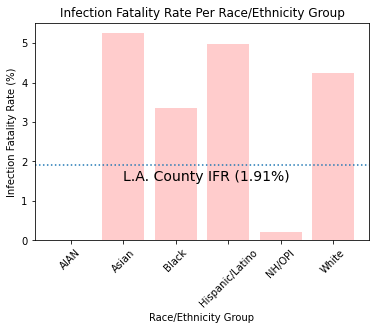

In [74]:
# Set variables for x- and y-axes
community_ifrs = [aian_los_angles_ifr, asian_los_angles_ifr, black_los_angles_ifr, hispanic_los_angles_ifr, nhopi_los_angles_ifr, white_los_angles_ifr]
populations = ["AIAN", "Asian", "Black", "Hispanic/Latino", "NH/OPI", "White"]

# Create bar plot showing infection fatality rates for each each race/ethnicity group
plt.bar(x=populations, height=community_ifrs, color="red", alpha=.2)
plt.title("Infection Fatality Rate Per Race/Ethnicity Group")
plt.xlabel("Race/Ethnicity Group")
plt.xticks(rotation=45)
plt.ylabel("Infection Fatality Rate (%)")
plt.axhline(y=los_angles_ifr, linestyle=":")
plt.annotate(text=f"L.A. County IFR ({los_angles_ifr}%)", xy=(1,1.5), size="14")
plt.show()

## Plot percetage of COVID-19 deaths over time for a given race/ethnicity against % population of said race/ethnicity

In [24]:
# Set variable for months tracked for x-axis
months = los_angeles_deaths_by_month_df.index.tolist()

# Set variables for population percentage of each race/ethnicity
la_percent_aian = los_angeles_stats_df.loc["Pop % American Indian & Alaska Native"].iloc[0]
la_percent_asian = los_angeles_stats_df.loc["Pop % Asian"].iloc[0]
la_percent_black = los_angeles_stats_df.loc["Pop % Non-Hispanic Black"].iloc[0]
la_percent_hispanic = los_angeles_stats_df.loc["Pop % Hispanic"].iloc[0]
la_percent_nhopi = los_angeles_stats_df.loc["Pop % Native Hawaiian/Other Pacific Islander"].iloc[0]
la_percent_white = los_angeles_stats_df.loc["Pop % Non-Hispanic White"].iloc[0]

<ipython-input-44-cac7dbe9972e>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  la_aian_percent_deaths_fig.set_xticklabels(labels=months,rotation=45)
<ipython-input-44-cac7dbe9972e>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  la_asian_percent_deaths_fig.set_xticklabels(labels=months,rotation=45)
<ipython-input-44-cac7dbe9972e>:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  la_black_percent_deaths_fig.set_xticklabels(labels=months,rotation=45)
<ipython-input-44-cac7dbe9972e>:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  la_hispanic_percent_deaths_fig.set_xticklabels(labels=months,rotation=45)
<ipython-input-44-cac7dbe9972e>:77: UserWarning: FixedFormatter should only be used together with FixedLocator
  la_nhopi_percent_deaths_fig.set_xticklabels(labels=months,rotation=45)
<ipython-input-44-cac7dbe9972e>:92: UserWarning: FixedFormatter should only be

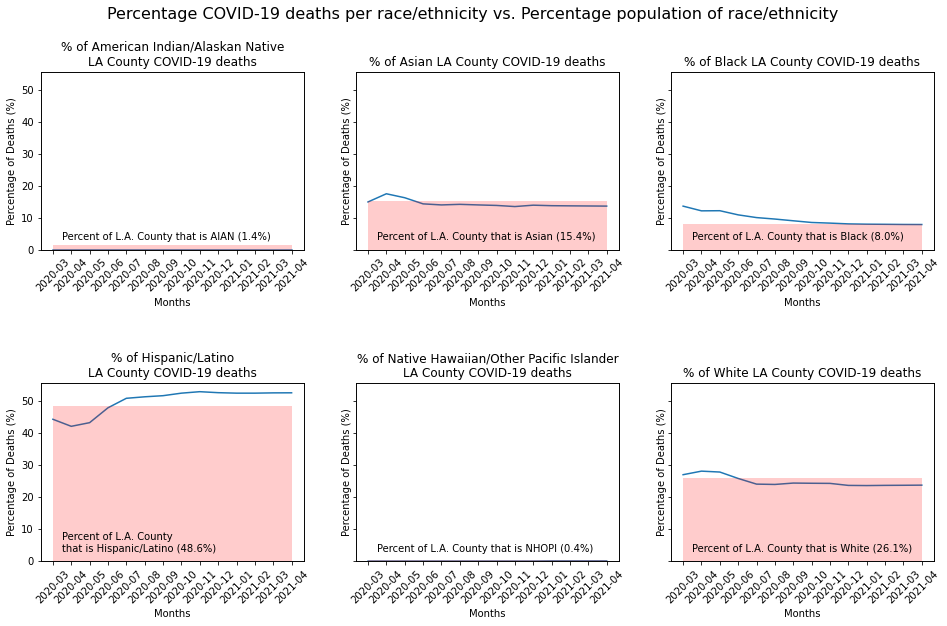

In [44]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(16,9), gridspec_kw={'hspace': .75})

fig.figsize=(15,9)
fig.suptitle("Percentage COVID-19 deaths per race/ethnicity vs. Percentage population of race/ethnicity", size=16)

la_aian_percent_deaths_fig = ax1
la_asian_percent_deaths_fig = ax2
la_black_percent_deaths_fig = ax3
la_hispanic_percent_deaths_fig = ax4
la_nhopi_percent_deaths_fig = ax5
la_white_percent_deaths_fig = ax6

# Subplot showing percentage of COVID-19 deaths that are AIAN patients and AIAN Los Angeles County population percentage
# Lineplot showing percentage of COVID-19 deaths that are AIAN patients
la_aian_percent_deaths_fig.set_title("% of American Indian/Alaskan Native\nLA County COVID-19 deaths")
la_aian_percent_deaths_fig.plot(months, percentage_deaths_aian_los_angeles)
la_aian_percent_deaths_fig.set_xticklabels(labels=months,rotation=45)
la_aian_percent_deaths_fig.set_xlabel(xlabel="Months")
la_aian_percent_deaths_fig.set_ylabel(ylabel="Percentage of Deaths (%)")

# Barplot showing percentage of Los Angeles County population that is AIAN
la_aian_percent_fig = la_aian_percent_deaths_fig.twiny()
la_aian_percent_fig.bar(x=1, height=[la_percent_aian], color="red", alpha=.2)
la_aian_percent_fig.set_xticks([])
la_aian_percent_fig.text(.63, 3, f"Percent of L.A. County that is AIAN ({la_percent_aian}%)", color='black')


# Subplot showing percentage of COVID-19 deaths that are Asian patients and Asian Los Angeles County population percentage
# Lineplot showing percentage of COVID-19 deaths that are Asian patients
la_asian_percent_deaths_fig.set_title("% of Asian LA County COVID-19 deaths")
la_asian_percent_deaths_fig.plot(months, percentage_deaths_asian_los_angeles)
la_asian_percent_deaths_fig.set_xticklabels(labels=months,rotation=45)
la_asian_percent_deaths_fig.set_xlabel(xlabel="Months")
la_asian_percent_deaths_fig.set_ylabel(ylabel="Percentage of Deaths (%)")

# Barplot showing percentage of Los Angeles County population that is Asian
la_asian_percent_fig = la_asian_percent_deaths_fig.twiny()
la_asian_percent_fig.bar(x=1, height=[la_percent_asian], color="red", alpha=.2)
la_asian_percent_fig.set_xticks([])
la_asian_percent_fig.text(.63, 3, f"Percent of L.A. County that is Asian ({la_percent_asian}%)", color='black')


# Subplot showing percentage of COVID-19 deaths that are Black patients and Black Los Angeles County population percentage
# Lineplot showing percentage of COVID-19 deaths that are Black patients
la_black_percent_deaths_fig.set_title("% of Black LA County COVID-19 deaths")
la_black_percent_deaths_fig.plot(months, percentage_deaths_black_los_angeles)
la_black_percent_deaths_fig.set_xticklabels(labels=months,rotation=45)
la_black_percent_deaths_fig.set_xlabel(xlabel="Months")
la_black_percent_deaths_fig.set_ylabel(ylabel="Percentage of Deaths (%)")

# Barplot showing percentage of Los Angeles County population that is Black
la_black_percent_fig = la_black_percent_deaths_fig.twiny()
la_black_percent_fig.bar(x=1, height=[la_percent_black], color="red", alpha=.2)
la_black_percent_fig.set_xticks([])
la_black_percent_fig.text(.63, 3, f"Percent of L.A. County that is Black ({la_percent_black}%)", color='black')


# Subplot showing percentage of COVID-19 deaths that are Hispanic/Latino patients and Hispanic/Latino Los Angeles County population percentage
# Lineplot showing percentage of COVID-19 deaths that are Hispanic/Latino patients
la_hispanic_percent_deaths_fig.set_title("% of Hispanic/Latino\nLA County COVID-19 deaths")
la_hispanic_percent_deaths_fig.plot(months, percentage_deaths_hispanic_los_angeles)
la_hispanic_percent_deaths_fig.set_xticklabels(labels=months,rotation=45)
la_hispanic_percent_deaths_fig.set_xlabel(xlabel="Months")
la_hispanic_percent_deaths_fig.set_ylabel(ylabel="Percentage of Deaths (%)")

# Barplot showing percentage of Los Angeles County population that is Hispanic/Latino
la_hispanic_percent_fig = la_hispanic_percent_deaths_fig.twiny()
la_hispanic_percent_fig.bar(x=1, height=[la_percent_hispanic], color="red", alpha=.2)
la_hispanic_percent_fig.set_xticks([])
la_hispanic_percent_fig.text(.63, 3, f"Percent of L.A. County\nthat is Hispanic/Latino ({la_percent_hispanic}%)", color='black')


# Subplot showing percentage of COVID-19 deaths that are Native Hawaiian/Other Pacific Islander patients and Native Hawaiian/Other Pacific Islander Los Angeles County population percentage
# Lineplot showing percentage of COVID-19 deaths that are Native Hawaiian/Other Pacific Islander
la_nhopi_percent_deaths_fig.set_title("% of Native Hawaiian/Other Pacific Islander\nLA County COVID-19 deaths")
la_nhopi_percent_deaths_fig.plot(months, percentage_deaths_nhopi_los_angeles)
la_nhopi_percent_deaths_fig.set_xticklabels(labels=months,rotation=45)
la_nhopi_percent_deaths_fig.set_xlabel(xlabel="Months")
la_nhopi_percent_deaths_fig.set_ylabel(ylabel="Percentage of Deaths (%)")

# Barplot showing percentage of Los Angeles County population that is Native Hawaiian/Other Pacific Islander
la_nhopi_percent_fig = la_nhopi_percent_deaths_fig.twiny()
la_nhopi_percent_fig.bar(x=1, height=[la_percent_nhopi], color="red", alpha=.2)
la_nhopi_percent_fig.set_xticks([])
la_nhopi_percent_fig.text(.63, 3, f"Percent of L.A. County that is NHOPI ({la_percent_nhopi}%)", color='black')


# Subplot showing percentage of COVID-19 deaths that are White patients and White Los Angeles County population percentage
# Lineplot showing percentage of COVID-19 deaths that are White patients
la_white_percent_deaths_fig.set_title("% of White LA County COVID-19 deaths")
la_white_percent_deaths_fig.plot(months, percentage_deaths_white_los_angeles)
la_white_percent_deaths_fig.set_xticklabels(labels=months,rotation=45)
la_white_percent_deaths_fig.set_xlabel(xlabel="Months")
la_white_percent_deaths_fig.set_ylabel(ylabel="Percentage of Deaths (%)")

# Barplot showing percentage of Los Angeles County population that is White
la_white_percent_fig = la_white_percent_deaths_fig.twiny()
la_white_percent_fig.bar(x=1, height=[la_percent_white], color="red", alpha=.2)
la_white_percent_fig.set_xticks([])
la_white_percent_fig.text(.63, 3, f"Percent of L.A. County that is White ({la_percent_white}%)", color='black')


# plt.savefig("place_holder_for_erin.png")
plt.show()


## Questions, observations, and conclusions

**Questions to investigate**
News outlets report that communities of color have been more heavily impacted by the pandemic than White communities. Looking at reported Los Angeles County deaths from March 2020, through April 2021, do the reports bear out in the data? Two questions were posed:
- Was the COVID-19 infection fatality rate (IFR)* of a given race/ethnicity group disproportionate compared with the IFR of the whole of Los Angeles County?
- In Los Angeles County, was the percentage of reported COVID-19 deaths of a given race/ethnicity group disproportionate to the given group's percentage of the County population?

**Observations**

From March 2020, through April 2021:
- Los Angeles County saw 1,211,222 reported COVID-19 cases and 23,152 resulting deaths: an infection fatality rate* of 1.91%.

- The American Indian & Alaskan Native population makes up 1.4% of Los Angeles County's total population. Within the American Indian & Alaska Native population in Los Angeles County, there were 4,599 reported COVID-19 cases and 0 resulting deaths—an infection fatality rate of 0.0% (1.91 percentage points below the County IFR). The percentage of County COVID-19 deaths composed of American Indian & Alaskan Native patient fatalities was flat at 0%, 1.4 percentage points below the American Indian & Alaska Native population percentage.

- The Asian population makes up 15.4% of Los Angeles County's total population. Within the Asian population in Los Angeles County, there were 60,200 reported COVID-19 cases and 3,163 resulting deaths—an infection fatality rate of 5.25% (3.34 percentage points higher than the County IFR). The percentage of County COVID-19 deaths composed of Asian patient fatalities peaked at 17.52% in April 2020 (2.2 percentage points above the Asian population percentage), and fell below the population percentage in June 2020, remaining lower than the population percentage through April 2021.

- The Black population makes up 8.0% of Los Angeles County's total population. Within the Black population in Los Angeles County, there were 54,357 reported COVID-19 cases and 1,829 resulting deaths—an infection fatality rate of 3.36% (1.45 percentage points higher than the County IFR). The percentage of County COVID-19 deaths composed of Black patient fatalities was 13.65% in March 2020 (5.65 percentage points above the Black population percentage), and remained above the population percentage for 11 months before falling below the population percentage in February 2021, remaining lower than the population percentage through April 2021.

- The Hispanic/Latino population makes up 48.6% of Los Angeles County's total population. Within the Hispanic/Latino population in Los Angeles County, there were 245,147 reported COVID-19 cases and 12,188 resulting deaths—an infection fatality rate of 4.97% (3.06 percentage points higher than the County IFR). The percentage of County COVID-19 deaths composed of Hispanic/Latino patient fatalities was below the Hispanic/Latino population percentage March 2020 through June 2020. The percentage of Hispanic/Latino patient fatalities rose above the population percentage in July 2020, remaining higher than the population percentage for 10 months through April 2021, peaking in November 2020 at 52.99% (4.39 percentage points above the population percentage).

- The Native Hawaiian/Other Pacific Islander population makes up 0.4% of Los Angeles County's total population. Within the Native Hawaiian/Other Pacific Islander population in Los Angeles County, there were 5,079 reported COVID-19 cases and 11 resulting deaths—an infection fatality rate of 0.22%.

- The White population makes up 26.1% of Los Angeles County's total population. Within the White population in Los Angeles County, there were 129,407 reported COVID-19 cases and 5,500 resulting deaths—an infection fatality rate of 4.25%.

**Conclusions**

- The Black and Hispanic/Latino populations of Los Angeles County had the longest history (11 months and 10 months respectively) of having thier percentage of COVID-19 deaths above their population percentages. 

_\* Infection fatality rates are based on reported cases and deaths. Once calculated with actual cases and deaths, rates are expected to be lower._

